<a href="https://colab.research.google.com/github/srsq64/CMT-Data-Science/blob/main/Session_III_Visual_representation_and_descriptive_analysis_on_norminal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learning outcome**

Jean Mathias, Foundation Programme, Durham University

* Visusal representaion of norminal data
* Descriptive analysis

# Import data and find basic information

In [ ]:
#First we import some packages (tools)
import pandas as pd  #import pandas and call it pd
import numpy as np   #import numpy and call it np
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
#first upload file from GitHub\
#Click on the dataset in your repository, then click on View Raw. 
#Copy the link to the raw dataset and store it as a string variable called url in Colab as shown below (a cleaner method but it’s not necessary). 
#The last step is to load the url into Pandas read_csv to get the dataframe.
url='https://raw.githubusercontent.com/srsq64/CMT-Data-Science/main/Avonford_cleaned.csv'
cyclying=pd.read_csv(url)
cyclying

,first name,last name,gender,age,distance from home,cause,injuries,overnights in hospital,time of accident,Time of accident numerical,day of accident,month of accident,Officer reporting,wearing a helmet?
0,Sharon,Griffin,f,7.0,75 m,uneven pavement,broken leg,1,2:35,2.58,Saturday,May,45211,y
1,Fred,Fuller,m,6.0,20m,fell over,concussion,1,3:15,3.25,Sunday,September,39813,y
2,Seren,Maher,f,16.0,20m,hit kerb,dislocated elbow,0,7:00,7.00,Wednesday,November,78264,n
3,James,Moore,m,20.0,2km,trying to fix chain,partially severed finger,0,7:00,7.00,Monday,June,97655,n
4,Claire,Higgins,f,19.0,10 km,hit by car at roundabout,fractured arm and sprained wrist,0,7:45,7.75,Monday,February,78264,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Alexander,Duggan,m,34.0,0.5 miles,brakes failed,concussion,0,19:30,19.50,Monday,January,39813,n
85,Cath,Pickin,f,16.0,half mile,puncture by nail,abrasions on leg,0,19:30,19.50,Tuesday,February,79655,y
86,John,Smith,m,45.0,3 km,skid,concussion,0,19:45,19.75,Tuesday,May,78264,y
87,Shelley,Mann,f,21.0,50m,slipped on wet leaves,"deep cuts to legs, strained wrist",0,21:00,21.00,Friday,January,97655,y


In [ ]:
day=cyclying.iloc[:,10] #Here we changed the data frame to data series, however, to cahnge it back to frame, code: age.to_frame(name="age")
day # Here the age is considered as norminal data (object)

0      Saturday
1        Sunday
2     Wednesday
3        Monday
4        Monday
        ...    
84       Monday
85      Tuesday
86      Tuesday
87       Friday
88     Saturday
Name: day of accident, Length: 89, dtype: object

In [ ]:
day.describe() #This gives you all the basic information

count          89
unique          7
top       Tuesday
freq           22
Name: day of accident, dtype: object

# Produce a bar chart

In [ ]:
#counter frequency of each category
import collections
counter=collections.Counter(day)
counter
# printing the element and the frequency
for key, value in counter.items():
   print(f"{key}: {value}")

Saturday: 12
Sunday: 7
Wednesday: 13
Monday: 19
Thursday: 8
Friday: 8
Tuesday: 22


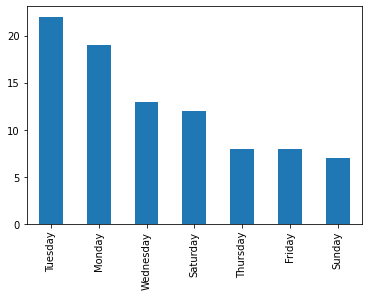

In [ ]:
cyclying['day of accident'].value_counts().plot(kind='bar')

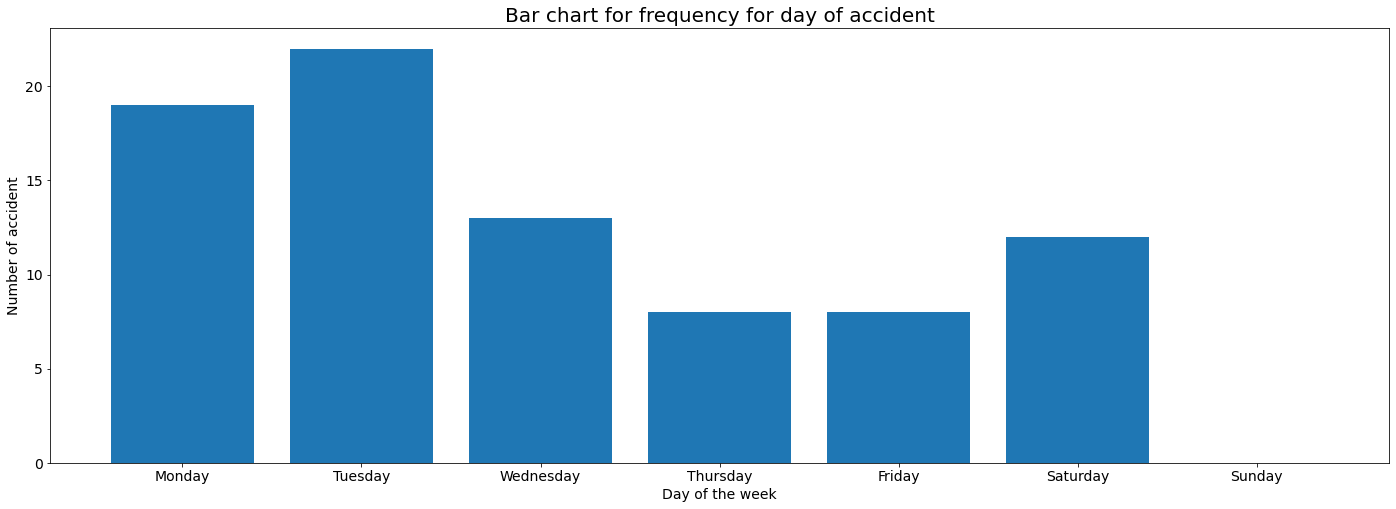

In [ ]:
from matplotlib.image import FigureImage
mon=sum(day=='Monday')
tue=sum(day=='Tuesday')
wed=sum(day=='Wednesday')
thu=sum(day=='Thursday')
fri=sum(day=='Friday')
sat=sum(day=='Saturday')
sun=sum(day=='Sun')

fig=plt.figure(figsize=(24,8))
x_axis=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_axis=[mon,tue,wed,thu,fri,sat,sun]

plt.bar(x_axis, y_axis)
plt.title('Bar chart for frequency for day of accident', fontsize=20)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Number of accident',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Alternative way to produce a bar chart

In [ ]:
#Count frequency of unique occurance in a coulmn, 
#injuries.value_counts()

#if inluding missing values:
#injuries.value_counts()(dropna=False)

#Use the groupby() method:
fq=day.groupby(day).count()
fq 
#in the table below, the first column is index

day of accident
Friday        8
Monday       19
Saturday     12
Sunday        7
Thursday      8
Tuesday      22
Wednesday    13
Name: day of accident, dtype: int64

In [ ]:
fq.dtype

dtype('int64')

In [ ]:
fq.values

array([ 8, 19, 12,  7,  8, 22, 13])

In [ ]:
#call out a cell
fq['Friday']

8

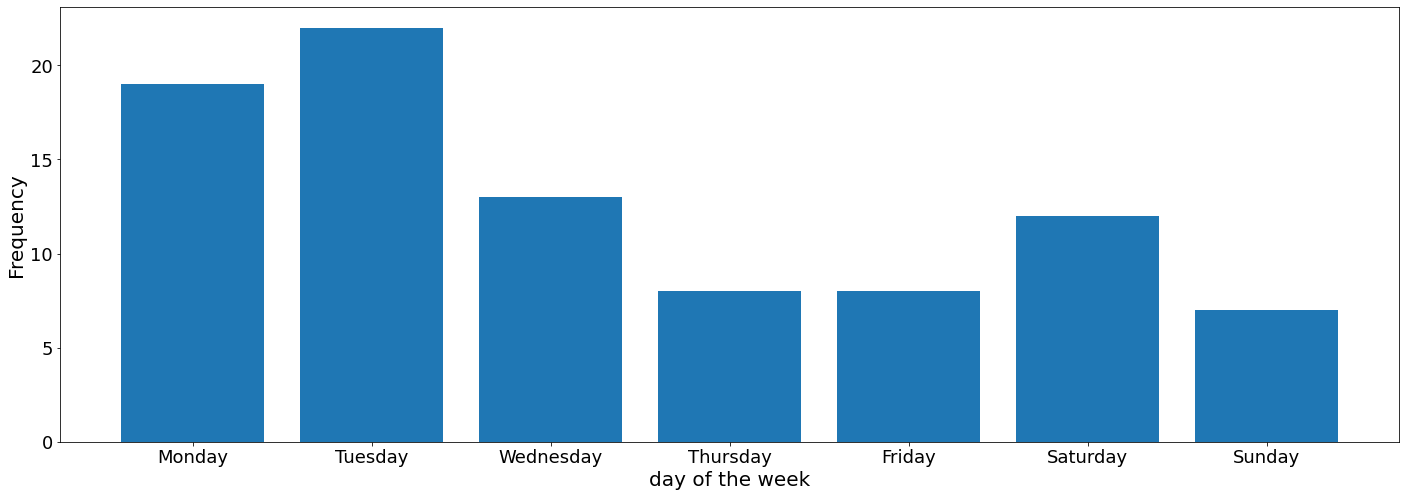

In [ ]:
# bar chart
plt.figure(figsize=(24,8))
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
frequency = [fq['Monday'], fq['Tuesday'], fq['Wednesday'],fq['Thursday'], fq['Friday'],fq['Saturday'],fq['Sunday']]
plt.bar(day,frequency)
plt.xlabel('day of the week',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Coumpound bar chart

In [ ]:
#find the frequency
femalefq=female['day of accident'].groupby(female['day of accident']).count()
femalefq
malefq=male['day of accident'].groupby(male['day of accident']).count()
malefq

day of accident
Friday        5
Monday       17
Saturday      6
Sunday        6
Thursday      3
Tuesday      15
Wednesday     4
Name: day of accident, dtype: int64

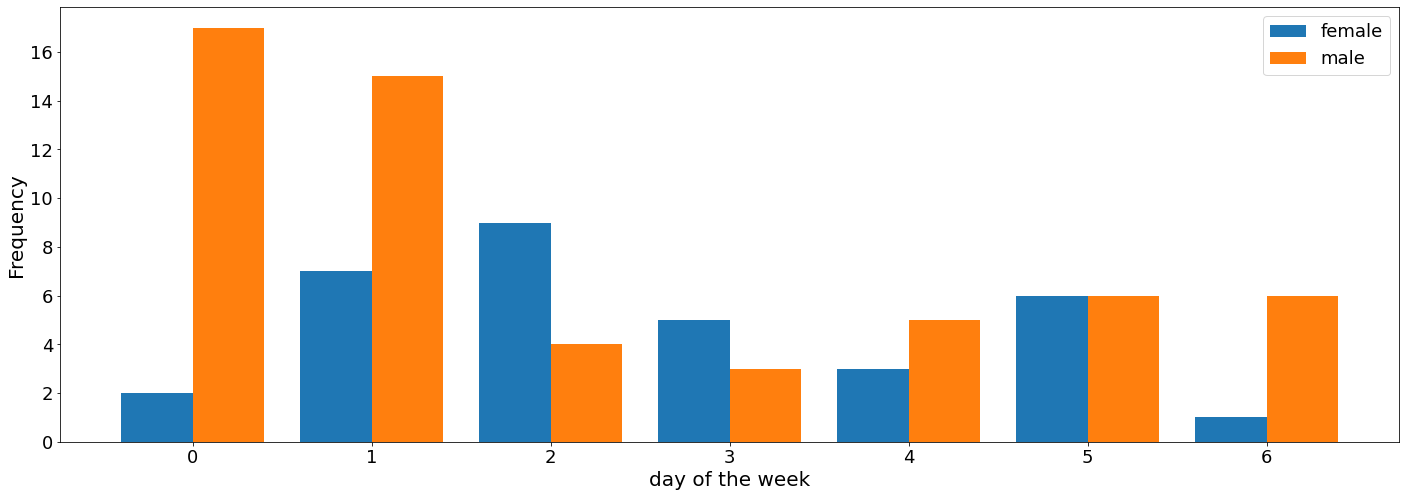

In [ ]:
# bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
femalefqtb = [femalefq['Monday'], femalefq['Tuesday'], femalefq['Wednesday'],femalefq['Thursday'], femalefq['Friday'],femalefq['Saturday'],femalefq['Sunday']]
malefqtb = [malefq['Monday'], malefq['Tuesday'], malefq['Wednesday'],malefq['Thursday'], malefq['Friday'],malefq['Saturday'],malefq['Sunday']]

X_axis = np.arange(len(day))

plt.bar(X_axis-0.2,femalefqtb,0.4) #here -0.2 gives the x location of the bar, 0.4 is the width
plt.bar(X_axis+0.2,malefqtb,0.4)
plt.legend(['female','male'],fontsize=18)
plt.xlabel('day of the week',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Produce a pie chart

AttributeError: ignored

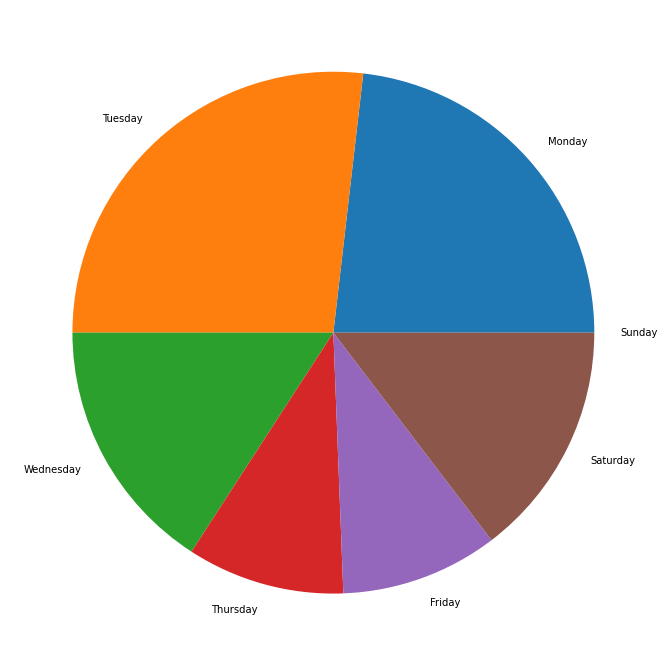

In [ ]:
fig=plt.figure(figsize=(12,12))
my_labels=[ 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.pie(y_axis, labels=x_axis)
plt.title('Pie chart for distribution for day of accident')